In [1]:
import numpy as np

In [2]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [3]:
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [4]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [5]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [6]:
y = np.array([0, 1, 0, 0, 0])

In [7]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [8]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [9]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [10]:
cross_entropy_error(y_hat2, y)

2.9957302735559908

In [11]:
import mnist

my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [12]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [13]:
train_size = train_images.shape[0]
batch_size = 32

In [14]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[27365 29060 40825 51933  3335 37257 10742 39769  2803  1164 52361 24096
 40370 49970 11882 24152 55629 49986 55029 22866 26618 29741 40736 41619
 25943   118 53765 29843  3978 26579 11275 55641]


In [15]:
train_size

60000

In [16]:
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [17]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [18]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [19]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [20]:
def func(x):
    return x**2 + 0.1*x

In [21]:
numerical_diff(func, 0.8)

0.0

In [22]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [23]:
numerical_diff(func, 0.8)

1.6999999999994797

In [24]:
numerical_diff(func, 0.2)

0.49999999999994493

In [25]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [26]:
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [27]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [28]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

#Numerical Gradient

In [29]:
def func2(x):
    return x[0]**2 + x[1]**2

In [30]:
def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [31]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [32]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [33]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [34]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [35]:
_numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

In [36]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [37]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

#SimpleNet

In [38]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [39]:
net = SimpleNet()
print(net.w)

[[-0.48987614 -0.72258367  0.60716633]
 [-1.18336105  0.81924252  0.36826661]]


In [40]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[-0.5677519  -0.35015249  0.49498709]


In [41]:
np.argmax(p)

2

In [42]:
y = np.array([0, 1, 0])
net.loss(x, y)

1.418942727949089

In [43]:
y = np.array([0, 0, 1])
net.loss(x, y)

0.5738033887662625

In [44]:
def loss_function(w):
    return net.loss(x, y)

In [45]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.13625629  0.1693787  -0.30563499]
 [ 0.03698385  0.04597422 -0.08295807]]


In [46]:
loss_function = lambda w: net.loss(x, y)

In [47]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.13625629  0.1693787  -0.30563499]
 [ 0.03698385  0.04597422 -0.08295807]]


#TwoLayerNet class

In [48]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [49]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [50]:
import activations
import errors

In [51]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    
 

#Train TwoLayerNet

In [52]:
import numpy as np
import mnist
from two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt


In [53]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [54]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [56]:
network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [57]:
network.params

{'w1': array([[-0.00986424, -0.00526498,  0.00106022, ...,  0.00694022,
         -0.01240261,  0.00535087],
        [-0.03158577,  0.01656019, -0.00645272, ...,  0.00222107,
          0.00576053,  0.00318236],
        [ 0.01910083, -0.0156997 ,  0.00694481, ..., -0.00420146,
          0.02327813, -0.01562829],
        ...,
        [ 0.0132382 , -0.00377344,  0.01259679, ...,  0.00520457,
          0.00127684, -0.00548439],
        [-0.02710162, -0.00328758, -0.00346452, ...,  0.00574311,
         -0.00341303, -0.00830517],
        [ 0.00781297,  0.00010894, -0.01612527, ..., -0.01231027,
          0.00392937,  0.00507152]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [58]:
iterations = 10 #10000
train_size = x_train[:100].shape[0]
batch_size = 2 #100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [ ]:
train_losses = []
train_accs = []
test_accs = []

: 

In [ ]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.09871666666666666, 0.098


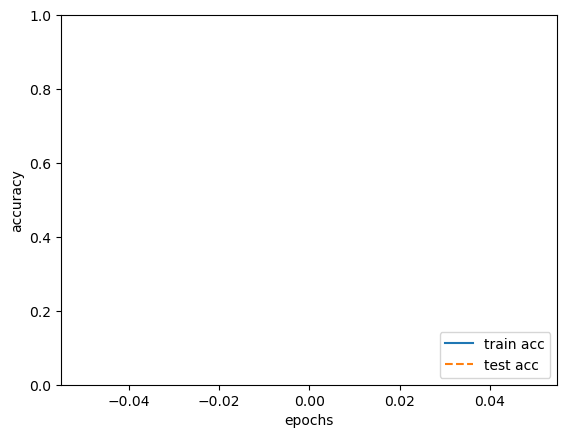

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#Backpropegation

In [1]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
    
class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

In [2]:
import numpy as np
from activations import Activations
from errors import Errors

In [3]:
from collections import OrderedDict

In [4]:
class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()


    def update_layers(self):
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [5]:
from mnist import Mnist

In [6]:
mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [8]:
print(x_train.shape)

(60000, 784)


In [13]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [14]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [15]:
train_losses = []
train_accs = []
test_accs = []

In [16]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.14195, 0.1393
train acc, test_acc : 0.9087166666666666, 0.9129
train acc, test_acc : 0.9270666666666667, 0.9278
train acc, test_acc : 0.9381, 0.9383
train acc, test_acc : 0.9472666666666667, 0.9462
train acc, test_acc : 0.9561333333333333, 0.9536
train acc, test_acc : 0.9584833333333334, 0.9539
train acc, test_acc : 0.9656, 0.9619
train acc, test_acc : 0.9696333333333333, 0.9651
train acc, test_acc : 0.9733166666666667, 0.968
train acc, test_acc : 0.9740833333333333, 0.9678
train acc, test_acc : 0.9773166666666666, 0.9707
train acc, test_acc : 0.9790833333333333, 0.9716
train acc, test_acc : 0.9797833333333333, 0.9712
train acc, test_acc : 0.9812666666666666, 0.9712
train acc, test_acc : 0.9824, 0.9739
train acc, test_acc : 0.9841833333333333, 0.974


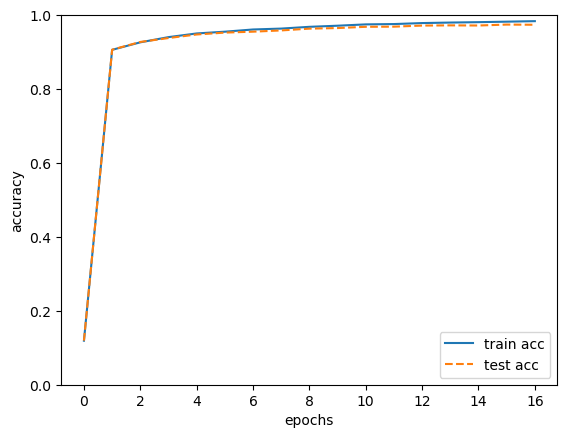

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#testing with other values

In [20]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [17]:
iterations = 50000
train_size = x_train.shape[0]
batch_size = 20
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [18]:
train_losses = []
train_accs = []
test_accs = []

In [19]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.9847166666666667, 0.9745
train acc, test_acc : 0.9780666666666666, 0.9711
train acc, test_acc : 0.9824833333333334, 0.9726
train acc, test_acc : 0.9880833333333333, 0.9761
train acc, test_acc : 0.9877333333333334, 0.9734
train acc, test_acc : 0.9906166666666667, 0.9779
train acc, test_acc : 0.9901, 0.9758
train acc, test_acc : 0.9939666666666667, 0.9775
train acc, test_acc : 0.9938333333333333, 0.9771
train acc, test_acc : 0.99555, 0.9776
train acc, test_acc : 0.9950833333333333, 0.9765
train acc, test_acc : 0.9928333333333333, 0.9767
train acc, test_acc : 0.9972833333333333, 0.9783
train acc, test_acc : 0.9966, 0.9778
train acc, test_acc : 0.9977, 0.9788
train acc, test_acc : 0.9986, 0.9804
train acc, test_acc : 0.999, 0.9791


In [21]:
network.params

{'w1': array([[ 0.01840758,  0.01188738,  0.01735229, ..., -0.00615166,
         -0.00631154, -0.009014  ],
        [ 0.00627563, -0.0078674 ,  0.00260525, ...,  0.00788088,
         -0.02661828,  0.00462091],
        [ 0.00678598, -0.0026925 ,  0.01111532, ...,  0.00158335,
          0.00836296, -0.00649377],
        ...,
        [-0.00127813,  0.00875154,  0.00939327, ..., -0.01106816,
          0.00102307, -0.01090418],
        [ 0.00373171,  0.02400734,  0.00262526, ..., -0.00786338,
         -0.00640312, -0.00871679],
        [-0.0152124 ,  0.00640513,  0.00291047, ...,  0.00537125,
         -0.01445029, -0.00505341]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

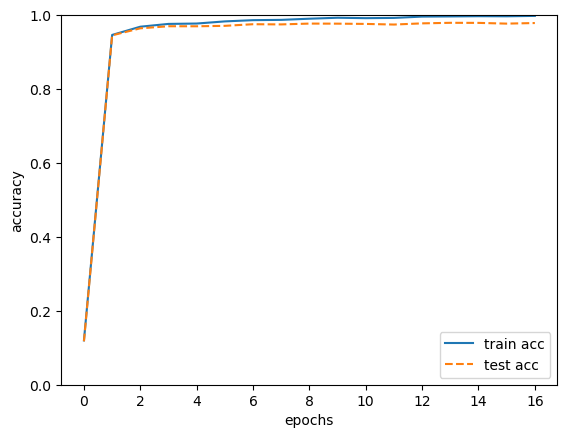

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#noticing a trend of smaller batch sizes = getting better guesses faster, definitely a trade off with performance

In [61]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [62]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 16
lr = 0.01

iter_per_ecoph = max(train_size/batch_size, 1)

In [63]:
train_losses = []
train_accs = []
test_accs = []

In [64]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.15081666666666665, 0.1576
train acc, test_acc : 0.8935333333333333, 0.8963
train acc, test_acc : 0.9123, 0.917


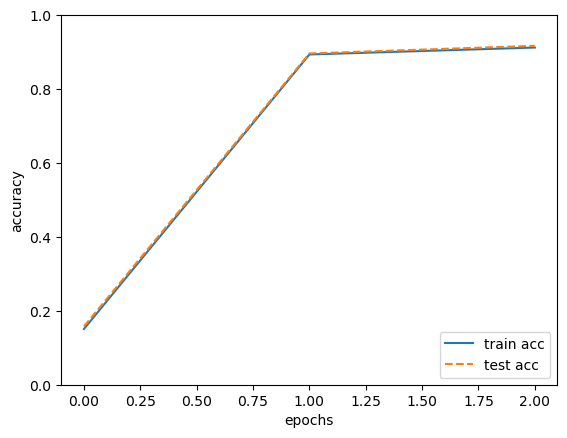

In [65]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [66]:
import numpy as np
import pickle

my_weight_pkl_file = 'Moore_mnist_model.pkl'

In [67]:
with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 

Pickle: Moore_mnist_model.pkl is being created.
Done.


In [30]:
network.params = None

#Using your own TwoLayerNet model

In [124]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [125]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

network.update_layers()

In [126]:
from mnist import Mnist

In [127]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [128]:
import matplotlib.pyplot as plt

In [129]:
y_hat = network.predict(x_test[0:100])

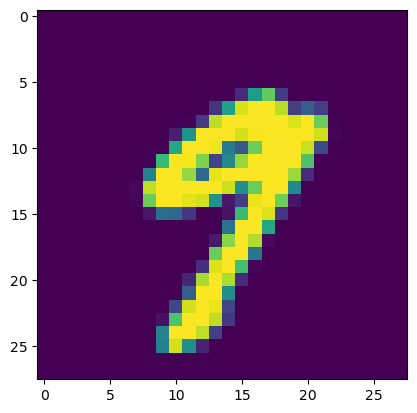

In [130]:
plt.imshow(x_test[20].reshape(28,28))

In [131]:
y_hat[20]

array([-3.11833875, -5.65945233, -5.8630161 ,  1.94490429,  3.19977452,
        0.81598973, -8.01261732,  6.19714893,  1.97872422,  8.48488898])

In [132]:
np.argmax(y_hat[20])

9

In [133]:
np.argmax(y_test[20])

9

In [47]:
from PIL import Image

#Testing handwritten numbers

In [48]:
img = Image.open("Custom MNIST Sample/Digit 9/9_4.png").convert('L')
img = img.resize((28,28))
img = np.array(img)
img = 255.0 - img
img = (img - np.min(img))*(255/(np.max(img)-np.min(img)))
img = img.astype(np.float32)/255
img = img.flatten()

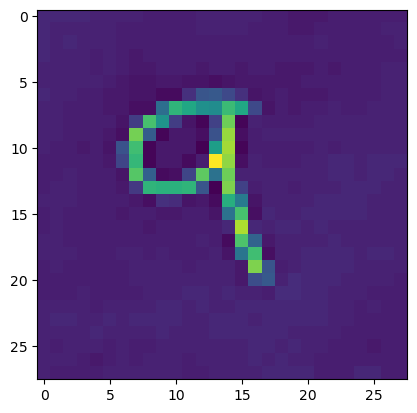

In [134]:
plt.imshow(img.reshape(28,28))

In [53]:
y_hat = network.predict(img)

ValueError: shapes (784,1) and (784,100) not aligned: 1 (dim 1) != 784 (dim 0)

In [ ]:
y_hat = network.predict(img)

ValueError: cannot reshape array of size 784 into shape (784,100)

Processing file: 0_0.png
Processing file: 0_1.png
Processing file: 0_2.png
Processing file: 0_3.png
Processing file: 0_4.png
Processing file: 1_0.png
Processing file: 1_1.png
Processing file: 1_2.png
Processing file: 1_3.png
Processing file: 1_4.png
Processing file: 2_0.png
Processing file: 2_1.png
Processing file: 2_2.png
Processing file: 2_3.png
Processing file: 2_4.png
Processing file: 3_0.png
Processing file: 3_1.png
Processing file: 3_2.png
Processing file: 3_3.png
Processing file: 3_4.png
Processing file: 4_0.png
Processing file: 4_1.png
Processing file: 4_2.png
Processing file: 4_3.png
Processing file: 4_4.png
Processing file: 5_0.png
Processing file: 5_1.png
Processing file: 5_2.png
Processing file: 5_3.png
Processing file: 5_4.png
Processing file: 6_0.png
Processing file: 6_1.png
Processing file: 6_2.png
Processing file: 6_3.png
Processing file: 6_4.png
Processing file: 7_0.png
Processing file: 7_1.png
Processing file: 7_2.png
Processing file: 7_3.png
Processing file: 7_4.png


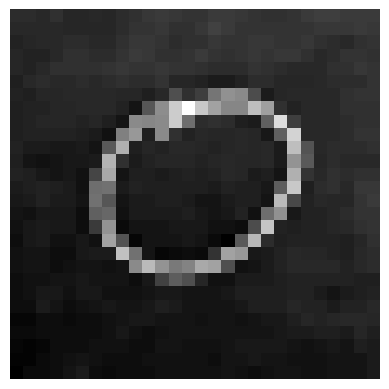

Shape of image_numpy: (50, 784)
First image (flattened): [0.17567568 0.17567568 0.16216217 0.1891892  0.14864865 0.14864865
 0.16216217 0.14864865 0.17567568 0.1891892  0.21621622 0.22972973
 0.21621622 0.2027027  0.2027027  0.22972973 0.22972973 0.21621622
 0.2027027  0.1891892  0.1891892  0.2027027  0.22972973 0.24324325
 0.24324325 0.22972973 0.22972973 0.22972973 0.16216217 0.16216217
 0.16216217 0.16216217 0.14864865 0.14864865 0.14864865 0.14864865
 0.17567568 0.2027027  0.2027027  0.21621622 0.1891892  0.1891892
 0.21621622 0.25675678 0.22972973 0.2027027  0.2027027  0.2027027
 0.2027027  0.2027027  0.2027027  0.21621622 0.21621622 0.21621622
 0.22972973 0.21621622 0.13513514 0.14864865 0.16216217 0.16216217
 0.17567568 0.17567568 0.16216217 0.16216217 0.1891892  0.21621622
 0.21621622 0.2027027  0.17567568 0.1891892  0.1891892  0.21621622
 0.2027027  0.2027027  0.21621622 0.21621622 0.2027027  0.2027027
 0.21621622 0.1891892  0.17567568 0.16216217 0.1891892  0.2027027
 0.148648

In [135]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def increase_contrast(image):
    """Increase contrast using contrast stretching."""
    # Find the minimum and maximum pixel values in the image
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    # Apply contrast stretching (stretching pixel values to full [0, 255] range)
    contrast_image = (image - min_pixel) * (255.0 / (max_pixel - min_pixel))
    
    # Clip values to ensure they remain within the valid range [0, 255]
    contrast_image = np.clip(contrast_image, 0, 255)
    
    return contrast_image

def load_images_from_subfolders(image_folder, target_size=(28, 28)):
    # List to hold all image arrays
    image_arrays = []

    # Loop through the folders and files recursively
    for subdir, _, files in os.walk(image_folder):
        for filename in files:
            # Only process files that end with '.PNG' (case-sensitive)
            if filename.endswith('.png'):
                print(f"Processing file: {filename}")  # Debugging line
                # Create the full path to the image file
                image_path = os.path.join(subdir, filename)

                try:
                    # Open the image using PIL and convert it to grayscale ('L' mode)
                    image = Image.open(image_path).convert('L')  # Convert to grayscale

                    # Resize the image to the target size (e.g., 28x28)
                    image = image.resize(target_size)

                    # Convert the resized image to a numpy array
                    image = np.array(image)

                    # Invert the image colors (255 - pixel value)
                    image = 255.0 - image

                    # Increase the contrast of the image
                    image = increase_contrast(image)

                    # Normalize the image to range [0, 255]
                    image = (image - np.min(image)) * (255 / (np.max(image) - np.min(image)))

                    # Convert to float32 and scale the values to [0, 1]
                    image = image.astype(np.float32) / 255.0

                    # Flatten the image
                    image = image.flatten()

                    # Append the processed image to the list
                    image_arrays.append(image)
                except Exception as e:
                    print(f"Failed to process {filename}: {e}")  # Print any error

    # Convert the list of image arrays into a single NumPy array (shape: num_images, flattened_pixels)
    if len(image_arrays) == 0:
        print("No images were processed.")
    else:
        print(f"Processed {len(image_arrays)} images.")

    images_numpy = np.array(image_arrays)

    return images_numpy

def display_image(image_numpy, index=0):
    """Displays an image using matplotlib."""
    # Check if the image_numpy array has any images
    if image_numpy.size == 0:
        print("No images to display.")
        return

    # Select an image by index from the numpy array
    img_to_display = image_numpy[index].reshape(28, 28)  # Grayscale images have shape (28, 28)

    # Display the image using matplotlib
    plt.imshow(img_to_display, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide the axes for better presentation
    plt.show()

# Example usage:
image_folder = 'Custom MNIST Sample'  # Replace with the path to your image folder
images = load_images_from_subfolders(image_folder)

# Display the first image from the array (you can change the index to display a different image)
display_image(images, index=0)

# Access the image_numpy array directly
print("Shape of image_numpy:", images.shape)  # Prints the shape of the image_numpy array

# Access the first image (flattened) directly:
first_image = images[0]
print("First image (flattened):", first_image)

# Access the first image in original shape (28x28)
first_image_reshaped = first_image.reshape(28, 28)
print("First image reshaped (28x28):\n", first_image_reshaped)


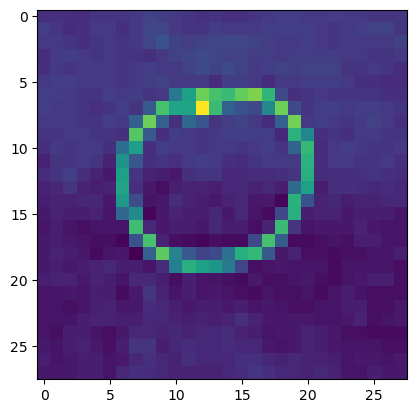

In [136]:
plt.imshow(images[2].reshape(28,28))

In [137]:
y_hat = network.predict(images[0:50])

In [138]:
y_hat[2]

array([ 1.83111845, -4.35858211,  1.26947759,  0.88147852, -2.3147502 ,
        1.00479271, -2.69069673,  1.95140283,  1.14875732,  1.15326268])

In [139]:
np.argmax(y_hat[2])

7

In [140]:
batch_size = 16
x = images[0:50]
#y = test_labels[0:10]

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_hat_batch = network.predict(x_batch)
    p = np.argmax(y_hat_batch, axis=1)
    print(p)

[0 0 7 0 0 5 5 5 3 3 2 2 2 2 2 3]
[3 3 3 3 3 3 4 4 4 5 5 5 5 3 5 5]
[2 2 2 8 1 3 3 7 5 5 5 5 8 3 3 5]
[3 5]


In [141]:
images.shape

(50, 784)